# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [44]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [45]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

594

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [46]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | umea
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | bilibino
Processing Record 4 of Set 1 | yulara
Processing Record 5 of Set 1 | hervey bay
Processing Record 6 of Set 1 | voh
Processing Record 7 of Set 1 | hendijan
City not found. Skipping...
Processing Record 8 of Set 1 | kapaa
Processing Record 9 of Set 1 | nusaybin
Processing Record 10 of Set 1 | ilulissat
Processing Record 11 of Set 1 | cabo san lucas
Processing Record 12 of Set 1 | upernavik
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | barrow
Processing Record 15 of Set 1 | vestmannaeyjar
Processing Record 16 of Set 1 | saskylakh
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | miraflores
Processing Record 19 of Set 1 | dikson
Processing Record 20 of Set 1 | vaini
Processing Record 21 of Set 1 | hobart
Processing Record 22 of Set 1 | rikitea
Processing Record 23 of Se

Processing Record 41 of Set 4 | gannan
Processing Record 42 of Set 4 | billings
Processing Record 43 of Set 4 | birao
Processing Record 44 of Set 4 | xining
Processing Record 45 of Set 4 | saleaula
City not found. Skipping...
Processing Record 46 of Set 4 | port blair
Processing Record 47 of Set 4 | warqla
City not found. Skipping...
Processing Record 48 of Set 4 | namatanai
Processing Record 49 of Set 4 | bayan
Processing Record 0 of Set 5 | grand gaube
Processing Record 1 of Set 5 | vila velha
Processing Record 2 of Set 5 | nizhnyaya tavda
Processing Record 3 of Set 5 | messina
Processing Record 4 of Set 5 | la libertad
Processing Record 5 of Set 5 | shache
Processing Record 6 of Set 5 | monte escobedo
Processing Record 7 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 8 of Set 5 | goderich
Processing Record 9 of Set 5 | east london
Processing Record 10 of Set 5 | caravelas
Processing Record 11 of Set 5 | katsuura
Processing Record 12 of Set 5 | lata
P

Processing Record 33 of Set 8 | nome
Processing Record 34 of Set 8 | vao
Processing Record 35 of Set 8 | haicheng
Processing Record 36 of Set 8 | betanzos
Processing Record 37 of Set 8 | emerald
Processing Record 38 of Set 8 | victor harbor
Processing Record 39 of Set 8 | balkhash
Processing Record 40 of Set 8 | kaeo
Processing Record 41 of Set 8 | kaohsiung
Processing Record 42 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 43 of Set 8 | kochevo
Processing Record 44 of Set 8 | hanna
Processing Record 45 of Set 8 | kununurra
Processing Record 46 of Set 8 | ust-barguzin
Processing Record 47 of Set 8 | winnemucca
Processing Record 48 of Set 8 | zhigansk
Processing Record 49 of Set 8 | dahra
Processing Record 0 of Set 9 | kajaani
Processing Record 1 of Set 9 | catuday
Processing Record 2 of Set 9 | salalah
Processing Record 3 of Set 9 | cherskiy
Processing Record 4 of Set 9 | hasaki
Processing Record 5 of Set 9 | kuche
City not found. Skipping...
Processing Record 

Processing Record 24 of Set 12 | madaoua
Processing Record 25 of Set 12 | champerico
Processing Record 26 of Set 12 | mareeba
Processing Record 27 of Set 12 | manhattan
Processing Record 28 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 29 of Set 12 | loandjili
Processing Record 30 of Set 12 | homa bay
Processing Record 31 of Set 12 | beloha
Processing Record 32 of Set 12 | teya
Processing Record 33 of Set 12 | grenfell
Processing Record 34 of Set 12 | formosa do rio preto
Processing Record 35 of Set 12 | lalpur
Processing Record 36 of Set 12 | talnakh
Processing Record 37 of Set 12 | jolalpan
Processing Record 38 of Set 12 | balite
Processing Record 39 of Set 12 | riacho de santana
Processing Record 40 of Set 12 | bom jesus da lapa
Processing Record 41 of Set 12 | mahajanga
Processing Record 42 of Set 12 | bibiani
Processing Record 43 of Set 12 | puqi
-----------------------------
Data Retrieval Complete      
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [57]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Show Record Count
city_data_pd.count()

City          549
Lat           549
Lng           549
Max Temp      549
Humidity      549
Cloudiness    549
Wind Speed    549
Country       549
Date          549
dtype: int64

In [55]:
# Display the City Data Frame
city_data_pd

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,umea,63.83,20.26,66.20,77,5,10.29,SE,1595183228
1,ushuaia,-54.80,-68.30,32.00,91,75,4.70,AR,1595182879
2,bilibino,68.05,166.44,57.61,63,0,2.82,RU,1595182923
3,yulara,-25.24,130.99,55.40,66,90,10.29,AU,1595182900
4,hervey bay,-25.30,152.85,55.00,90,0,5.99,AU,1595183153
...,...,...,...,...,...,...,...,...,...
544,riacho de santana,-13.61,-42.94,80.60,44,50,11.41,BR,1595183260
545,bom jesus da lapa,-13.26,-43.42,80.60,44,85,11.41,BR,1595183260
546,mahajanga,-15.72,46.32,75.20,41,20,13.87,MG,1595183260
547,bibiani,6.46,-2.32,75.29,96,30,2.68,GH,1595183260


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [56]:
city_data_pd.sort_values(by='Humidity', ascending=False)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
172,honiara,-9.43,159.95,71.60,100,40,5.82,SB,1595182890
116,cape town,-33.93,18.42,60.01,100,40,10.29,ZA,1595182773
533,petropavlovsk-kamchatskiy,53.05,158.65,50.00,100,40,8.95,RU,1595183070
373,hasaki,35.73,140.83,71.60,100,40,3.76,JP,1595182909
522,shelburne,44.08,-80.20,69.80,100,20,15.05,CA,1595183259
...,...,...,...,...,...,...,...,...,...
447,ejido hermosillo,32.51,-114.92,105.80,11,1,5.82,MX,1595183254
224,adrar,20.50,-10.07,107.94,10,45,9.17,MR,1595182917
460,sakakah,29.97,40.21,100.40,8,4,6.93,SA,1595183255
314,cedar city,37.68,-113.06,91.40,5,1,5.99,US,1595183246


In [104]:
# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

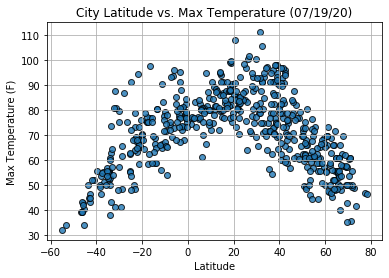

In [105]:
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

This plot shows the maximum temperatures (F) of corresponding city latitudes.

## Latitude vs. Humidity Plot

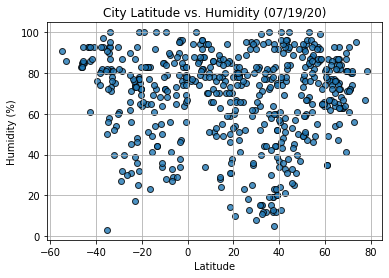

In [106]:
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

This plot shows the humidity % of corresponding city latitudes.

## Latitude vs. Cloudiness Plot

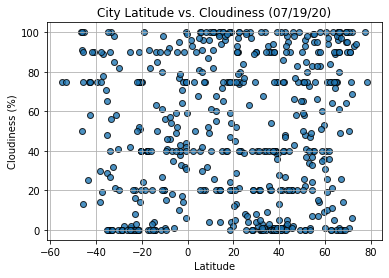

In [107]:
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

This plot shows the cloudiness % of corresponding city latitudes.

## Latitude vs. Wind Speed Plot

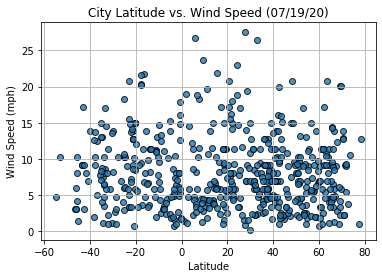

In [108]:
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

This plot shows the wind speed (mph) of corresponding city latitudes.

## Linear Regression

In [94]:
# OPTIONAL: Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [95]:
# Create DataFrames
northern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] >= 0)]
southern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.6907239878437712


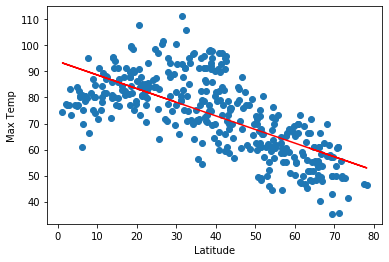

In [96]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))

This plot shows a strong, negative correlation to the maximum temperatures measured against the corresponding city latitudes within the Northern hemisphere.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7477061405208761


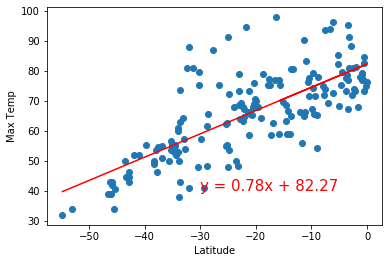

In [97]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-30,40))

This plot shows a strong, positive correlation to the maximum temperatures measured against the corresponding city latitudes within the Southern hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.05764425496659958


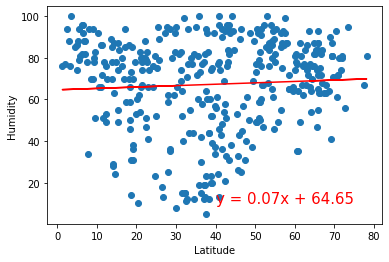

In [98]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))

This plot shows a weak, positive correlation to the humidity % measured against the corresponding city latitudes within the Northern hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.19252278178362722


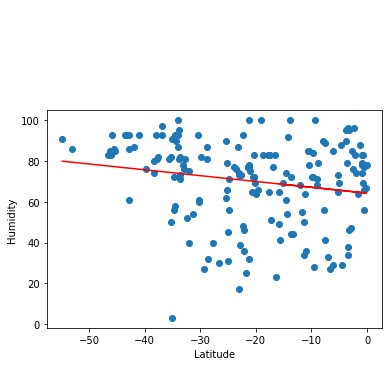

In [99]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-30,150))

This plot shows a weak, negative correlation to the humidity % measured against the corresponding city latitudes within the Southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.007232589317311998


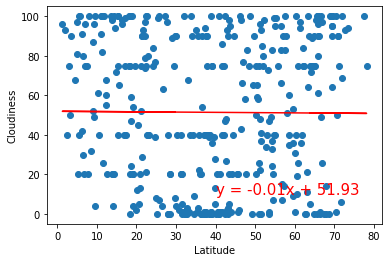

In [100]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,10))

This plot shows a weak, negative correlation to the cloudiness % measured against the corresponding city latitudes within the Northern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.04227721486709548


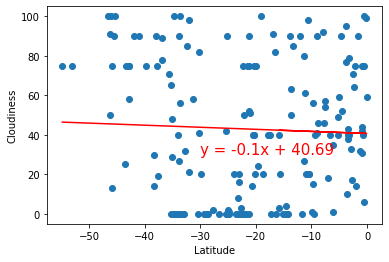

In [101]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,30))

This plot shows a weak, negative correlation to the cloudiness % measured against the corresponding city latitudes within the Southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.06456129947117749


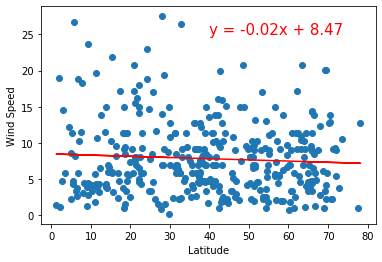

In [102]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,25))

This plot shows a weak, negative correlation to the wind speed (mph) measured against the corresponding city latitudes within the Northern hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.030414205320483282


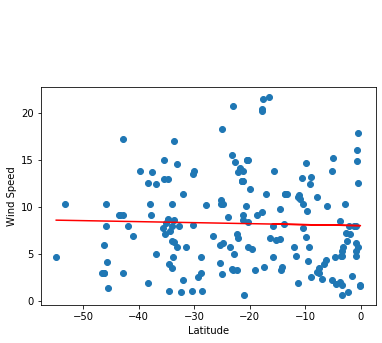

In [103]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-30,30))

This plot shows a weak, negative correlation to the wind speed (mph) measured against the corresponding city latitudes within the Southern hemisphere.